## Portfolio Construction

In [1]:
import matplotlib.pyplot as plt
from pyportfolio import Portfolio

We created two classes, Portfolio and Allocation.

Let's build a simple portfolio with a Stock ETF and a Bond ETF

1. SPY (S&P 500 Tracking ETF)
2. IGIB (iShares Trust 5-10 year investment Grade Corporate Bond ETF)

In [2]:
myPortfolioId = Portfolio.getPortfolioMapping(7, 11)

In [3]:
myPortfolio = Portfolio(portfolioName="Core", tickerString="SPY IGIB", expectedReturn=0.05, riskBucket=3)


[*********************100%***********************]  2 of 2 completed


In [4]:
myPortfolio.get_class_alloc()

,Type,Weight
0,IGIB,0.31915
1,SPY,0.68085


## Visualizing the Efficient Frontier Model

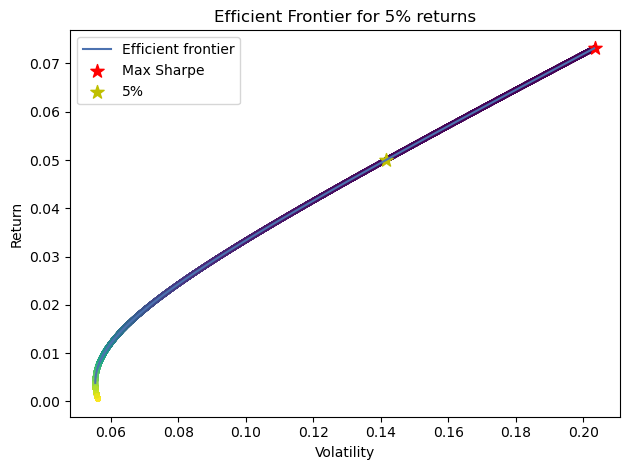

In [5]:
myPortfolio.show_efficient_frontier()

In [6]:
myPortfolio2 = Portfolio(portfolioName="Grow", tickerString='SPY WMT JNJ JNPR ORCL CVS ABBNY BAC CPNG BX USRT T SHEL USRT', expectedReturn=0.10, riskBucket=5)
myPortfolio2.get_class_alloc()

[*********************100%***********************]  13 of 13 completed


,Type,Weight
0,ABBNY,0.08079
1,BAC,0.00000
2,BX,0.00000
3,CPNG,0.00000
4,CVS,0.00000
5,JNJ,0.42614
6,JNPR,0.00000
7,ORCL,0.13995
8,SHEL,0.13313
9,SPY,0.00000


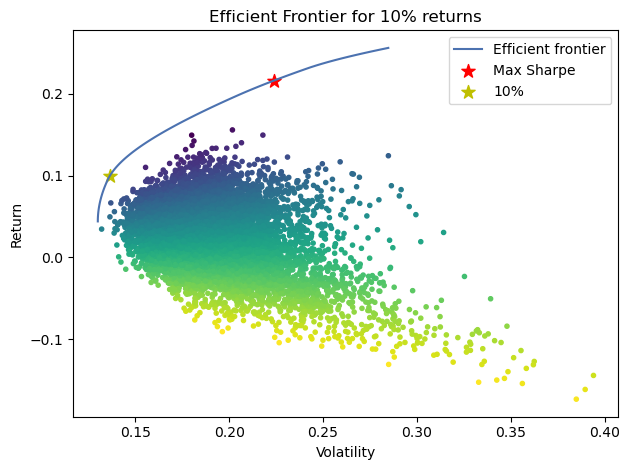

In [7]:
myPortfolio2.show_efficient_frontier()

## Analyzing a Portfolio

What if we have a portfolio already created? How can we see what the expected performance will be?

We can set the weights of each asset we added to our portfolio like in the code below. Here we said we have 75% of our portfolio consists of SPY and the remaining 25 consists of IGIB. It doesn't do too good compared to the optimized portfolio above.

In [8]:
myPortfolio.ef.set_weights({'SPY': 0.75, 'IGIB': 0.25})
myPortfolio.ef.portfolio_performance(verbose=True)

Expected annual return: 5.5%
Annual volatility: 15.5%
Sharpe Ratio: 0.23


(0.05503015037137665, 0.15467723522811158, 0.2264725660483628)

## Profiling a Portfolio

To understand the diversification of our portfolio we can look at:
1. Asset Class
2. Asset Industry (Sector)
3. Asset Region
and others, but for simplicity we will stick with these three.

In [9]:
market = myPortfolio.get_market()
class_alloc = myPortfolio.get_class_alloc()

In [10]:
#no longer provided by yfinance package
#using yahooquery instead
from yahooquery import Ticker
df = Ticker('SPY').fund_sector_weightings
df.reset_index(inplace=True)

sector_weights = df[df.columns[1]]
sector_labels = df[df.columns[0]]

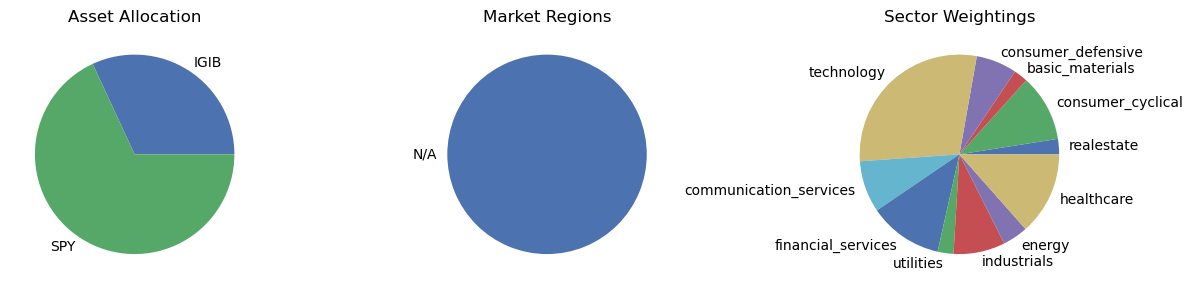

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,10))
# plot the first pie chart on the first axes
ax1.pie(class_alloc['Weight'],labels=class_alloc['Type'])
ax1.set_title("Asset Allocation")
# plot the second pie chart on the second axes
ax2.pie(market['weight'],labels=market.index)
ax2.set_title("Market Regions")

#plot sector weightings for Stock ETF
ax3.pie(sector_weights, labels = sector_labels)
ax3.set_title("Sector Weightings")

#modify layout
fig.tight_layout()
# show the figure
plt.show()